# Google Trends API for Python

## En este tutorial, demostraré cómo usar la API de Google Trends para obtener los temas de tendencias actuales en Internet.

![alt text](https://cdn-images-1.medium.com/max/1200/1*Fi6masemXJT3Q8YWekQCDQ.png)

# Introduction

[Google trends](https://trends.google.com/trends/?geo=US) es un sitio web que analiza y enumera los resultados de búsqueda populares en la búsqueda de Google en función de varias regiones e idiomas. Google Trends es el sitio web de Google (obviamente). Con la ayuda de este tutorial, puede obtener los resultados de tendencias y muchos más del sitio web de tendencias de Google usando python. No necesita buscar y copiar manualmente los resultados de tendencias, la API de Python llamada `pytrends` hace el trabajo por usted. Antes de comenzar, quiero que todos revisen la documentación oficial de la API `pytrends`.

[pytrends API](https://pypi.org/project/pytrends/)



---

# Instalación



In [1]:
!pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=b7fce0312c9ae0d7f4929508742d1b41e4cf090964e5adcbf3706f2d5970e6a5
  Stored in directory: c:\users\juanesmejia\appdata\local\pip\cache\wheels\87\a9\a3\c190a7e0872639762e92cf3a84d6845ed086e10966533faf42
Successfully built pytrends


# Implementación

## Conexión a Google

Primero debe conectarse a Google porque, después de todo, estamos solicitando los temas de tendencias de Google de Google Trends. Para esto, necesitamos importar el método llamado `TrendReq` de la biblioteca `pytrends.request`. Además, importaré la biblioteca de pandas para almacenar y visualizar los datos que verá en el tutorial posterior.

In [1]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

- keywords: define las palabras clave de interés.
- Countries: contiene las abreviaturas de los países donde se realizan las búsquedas. Los códigos de país para todos los países del mundo están disponibles aquí.https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
- Date_interval: especifica el período de tiempo en formato aaaa-mm-dd. También se puede usar “today 3-m” y “today 1-m” para los últimos 3 y 1 meses, etc.
- Category: establece las subcategorías de tendencias de Google que se enumeran aquí. https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
- Search_type: está configurado de forma predeterminada en “web searches”. Otros tipos incluyen “images”, “news”, “youtube“, y  “froogle” (google shopping).



---



## Interés por región

Veamos los términos que son populares en la región en todo el mundo. 

In [32]:
pytrend.build_payload(kw_list=['Democracia'])
# Interés por Región
df = pytrend.interest_by_region()
df.head(10)

,Democracia
geoName,
Amazonas Department,57
Antioquia,37
Arauca,44
Atlantico,42
Bogota,26
Bolivar,64
Boyaca,35
Caldas,32
Caquetá,51


**Ahora podrías estar pensando ¿cuáles son los valores, qué denotan?**

Los valores se calculan en una escala de 0 a 100, donde 100 es la ubicación con la mayor popularidad como fracción del total de búsquedas en esa ubicación, un valor de 50 indica una ubicación que es la mitad de popular. Un valor de 0 indica una ubicación donde no hubo suficientes datos para este término. Fuente → [Google Trends](https://support.google.com/trends/answer/4355212)..

Tracemos el resultado en un gráfico de barras porque a veces la representación visual da una imagen clara.

<AxesSubplot:xlabel='geoName'>

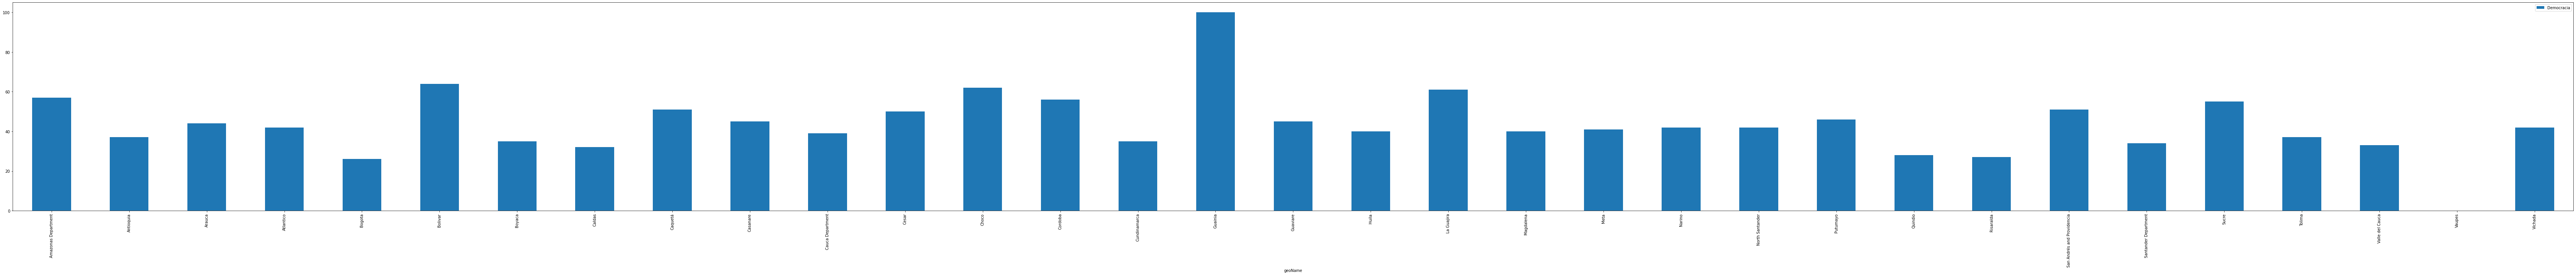

In [33]:
df.reset_index().plot(x='geoName', y='Democracia', figsize=(120, 10), kind ='bar')

Además, utiliza el parámetro `resolution = 'COUNTRY_NAME'` para filtrar los resultados.


---



## Tendencias de búsqueda diarias

Ahora permítanos obtener las principales tendencias de búsqueda diarias en todo el mundo. Para hacer esto tenemos que usar el método `trending_searches()`. Si desea buscar en todo el mundo simplemente no pase ningún parámetro.

In [34]:
# Obtener datos de Google Hot Trends
df = pytrend.trending_searches(pn='colombia')
df.head(10)

,0
0,Japón Ecuador
1,Mauricio Claver-Carone BID
2,Toto Vega
3,Inglaterra vs Alemania
4,Colombia vs mexico
5,Jaguares vs Águilas Doradas
6,Manifestaciones hoy
7,Hungría vs Italia
8,Portugal vs
9,SuperGIROS




---



Veamos qué fue tendencia en 2019. Con la ayuda del método top_charts podemos obtener las principales búsquedas de tendencia anualmente.## Top Charts

In [35]:
# Get Google Top Charts
df = pytrend.top_charts(2021, hl='en-US', tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


In [36]:
# Get Google Top Charts
df = pytrend.top_charts(2021, hl='es-CO', tz=300, geo='CO')
df.head(10)

,title,exploreQuery
0,Copa América,copa america
1,Mi Vacuna,
2,Migración Colombia,
3,Eurocopa,
4,Eliminatorias Qatar 2022,
5,Salario mínimo 2021,
6,Cine Colombia,
7,Ejército Nacional,
8,Giro de Italia,
9,Prevención COVID-19,Prevencion COVID 19


In [37]:
## Extración Topicos Relacionados

In [52]:
Keywords=['Petro', 'Uribe']
Countries=['CO']
Date_interval='today 3-m'
Category=0
Search_type=''

In [54]:
pytrend.build_payload(kw_list=Keywords,
                              timeframe = Date_interval,
                              geo = Country,
                              cat=Category,
                              gprop=Search_type)

pytrend.interest_over_time()

,Petro,Uribe,isPartial
date,,,
2022-06-27,14,3,False
2022-06-28,12,3,False
2022-06-29,15,8,False
2022-06-30,12,7,False
2022-07-01,7,3,False
...,...,...,...
2022-09-19,6,2,False
2022-09-20,11,2,False
2022-09-21,11,2,False


In [55]:
Individual_keyword = list(zip(*[iter(Keywords)]*1))
Individual_keyword = [list(x) for x in Individual_keyword]
dicti = []

for Country in Countries:
    for keyword in Individual_keyword:
        pytrend.build_payload(kw_list=keyword,
                              timeframe = Date_interval,
                              geo = Country,
                              cat=Category,
                              gprop=Search_type)
        dicti.append(pytrend.related_topics())

ResponseError: The request failed: Google returned a response with code 429.

In [ ]:
df = []

for dict in dicti:
    for kw in dict:
        rising = dict[kw]['rising']

        for index, row in rising.iterrows():
            df.append([
                row.array[0],
                row.array[1],
                row.array[2],
                row.array[3],
                row.array[4],
                row.array[5],
                kw,
                'rising',
            ])

        top = dict[kw]['top']

        for index, row in top.iterrows():
            df.append([
                row.array[0],
                row.array[1],
                row.array[2],
                row.array[3],
                row.array[4],
                row.array[5],
                kw,
                'top',
            ])
            
data = pd.DataFrame(df, columns=['value','change','url', 'url_2',
                                    'category','topic', 'key_word','measure'])


In [56]:
data.head(10)

,value,change,url,url_2,category,topic,key_word,measure
0,42800,Breakout,/trends/explore?q=/m/03k6v6&date=today+3-m&geo=CO,/m/03k6v6,Minister of justice,Topic,Petro,rising
1,25500,Breakout,/trends/explore?q=/m/0bdt3v&date=today+3-m&geo=CO,/m/0bdt3v,Culture minister,Topic,Petro,rising
2,20200,Breakout,/trends/explore?q=/m/0crgwlh&date=today+3-m&ge...,/m/0crgwlh,Ministry of Information Technologies and Commu...,Colombia,Petro,rising
3,17900,Breakout,/trends/explore?q=/g/11dyjyfyc&date=today+3-m&...,/g/11dyjyfyc,agriculture minister,Topic,Petro,rising
4,14400,Breakout,/trends/explore?q=/g/120ykwk4&date=today+3-m&g...,/g/120ykwk4,Ministry of Mines and Energy,Colombia,Petro,rising
5,12950,Breakout,/trends/explore?q=/m/06y5r&date=today+3-m&geo=CO,/m/06y5r,Sword,Topic,Petro,rising
6,12100,Breakout,/trends/explore?q=/m/0613q&date=today+3-m&geo=CO,/m/0613q,Possession,Law,Petro,rising
7,9350,Breakout,/trends/explore?q=/m/07t65&date=today+3-m&geo=CO,/m/07t65,United Nations,Intergovernmental organization,Petro,rising
8,4800,"+4,800%",/trends/explore?q=/m/05172y&date=today+3-m&geo=CO,/m/05172y,Director general,Topic,Petro,rising
9,3200,"+3,200%",/trends/explore?q=/g/11bv17sjv4&date=today+3-m...,/g/11bv17sjv4,Iván Velásquez Gómez,Minister of National Defence of Colombia,Petro,rising


In [ ]:

rising = data.loc[(data['measure'] == 'rising'), ['value','change','category',
                                                  'topic', 'key_word','measure']]

## Graficar

In [63]:
kw_list = ['Petro', 'Uribe', 'Ministra Minas']
kw_group = list(zip(*[iter(kw_list)]*1))
kw_grplist = [list(x) for x in kw_group]

In [68]:
from pytrends.request import TrendReq
import pytrends
import pandas as pd
trendshow = TrendReq(hl='es-CO', tz=300)
dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 3-m', geo='CO')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe

,Petro,Uribe,Ministra Minas
date,,,
2022-06-27,14,42,3
2022-06-28,12,38,3
2022-06-29,15,100,0
2022-06-30,12,98,0
2022-07-01,7,44,0
...,...,...,...
2022-09-19,6,30,10
2022-09-20,11,26,2
2022-09-21,11,31,7


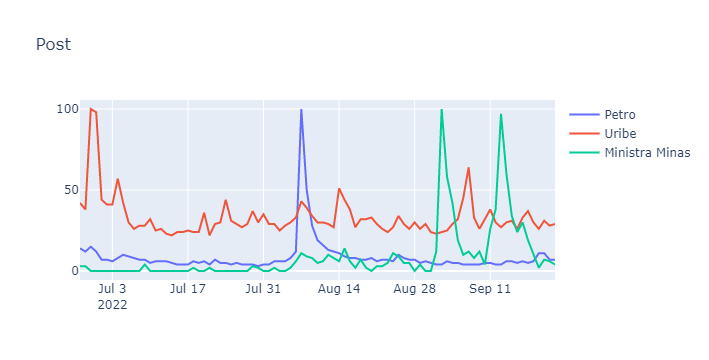

In [69]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
init_notebook_mode(connected=True)

trace = [go.Scatter(
x = trendframe.index,
y = trendframe[col], name=col) for col in trendframe.columns]

data = trace
layout = go.Layout(title='Post', showlegend=True)
fig = go.Figure(data=data, layout=layout)

iplot(fig)

## Sugerencias de palabras clave de Google

Veamos cómo podemos obtener la sugerencia de palabras clave de Google. Si no sabes de lo que estoy hablando. La imagen de abajo explica las cosas más claras.

![alt text](https://cdn-images-1.medium.com/max/1200/1*QRpWWBS1SHXBr71Jp1NwQA.png)

In [21]:
# Obtener sugerencias de palabras clave de Google
keywords = pytrend.suggestions(keyword='Privacidad')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Privacy,Topic
1,The Resident,Film
2,Private Lives,TV series
3,NordVPN,Software
4,Privacy policy,Topic




---



## Consultas relacionadas

Es común que cuando un usuario busca un tema, también busque algo relacionado. Estas se denominan consultas relacionadas. Veamos cuáles son las consultas relacionadas con el tema "***Coronavirus***". Recuerde siempre que cuando desee cambiar el nombre del tema, simplemente ejecute el siguiente código nuevamente con el nuevo nombre como parámetro.

In [22]:
pytrend.build_payload(kw_list=['Coronavirus'])

Ahora ejecutemos el método `related_queries` que devuelve un diccionario lleno de consultas relacionadas con el tema ***Coronavirus***

In [24]:
# Consultas relacionadas, devuelve un diccionario de marcos de datos
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                             query  value
0              coronavirus update    100
1               coronavirus cases     91
2                coronavirus news     68
3                  coronavirus uk     67
4                          corona     57
5               india coronavirus     49
6            coronavirus symptoms     40
7              france coronavirus     35
8                     worldometer     34
9         coronavirus worldometer     34
10                 us coronavirus     32
11  thank you coronavirus helpers     32
12              world coronavirus     30
13                usa coronavirus     30
14               coronavirus tips     29
15             coronavirus italia     28
16                coronavirus map     28
17             coronavirus deaths     27
18               coronavirus live     25
19                   corona virus     24
20                       covid 19     23
21             coronavirus españa     23
22              china coronavirus   

Similarly, you can also search for the related topics just run the below code to do so:

In [25]:
# Consultas relacionadas, devuelve un diccionario de marcos de datos
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':      value formattedValue                                            link  \
0   203500       Breakout  /trends/explore?q=/g/11ckxx4f1g&date=today+5-y   
1    76300       Breakout  /trends/explore?q=/g/11jg8c8t98&date=today+5-y   
2    31850       Breakout      /trends/explore?q=/m/0chgr2&date=today+5-y   
3    25150       Breakout  /trends/explore?q=/g/11jfc_hmzh&date=today+5-y   
4    23600       Breakout       /trends/explore?q=/m/0bzty&date=today+5-y   
5    19650       Breakout       /trends/explore?q=/m/0l3cy&date=today+5-y   
6    16550       Breakout  /trends/explore?q=/g/11j5cvcfjp&date=today+5-y   
7    16400       Breakout       /trends/explore?q=/m/06w92&date=today+5-y   
8    15050       Breakout       /trends/explore?q=/m/094z8&date=today+5-y   
9    13850       Breakout       /trends/explore?q=/m/07kg3&date=today+5-y   
10   13050       Breakout       /trends/explore?q=/m/010sh&date=today+5-y   
11   13000       Breakout       /trends/explore?q=/m



---



## Descarga  de varias consultas relacionadas

In [13]:
#proporciona tus términos de búsqueda
kw_list=['HBO', 'Amazon', 'Netflix', 'Disney+']
pytrend.build_payload(kw_list=kw_list)


#Obtener consultas relacionadas
consultas_relacionadas = pytrend.related_queries()
consultas_relacionadas.values()

#construir marcos de datos de listas

top  = list(consultas_relacionadas.values())[0]['top']
rising  = list(consultas_relacionadas.values())[0]['rising']

#convertir listas en marcos de datos

dftop = pd.DataFrame(top )
dfrising = pd.DataFrame(rising )

#unir dos marcos de datos
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#función para cambiar duplicados

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename a nombres propios

allqueries.rename({'consulta': 'consulta principal', 'valor': 'valor de consulta principal', 'consulta.1': 'consulta relacionada', 'valor.1': 'valor de consulta relacionado'}, axis= 1, inplace = True)

#verifique su conjunto de datos
allqueries.head(50)

#guardar en csv
allqueries.to_csv('allqueries.csv')



ResponseError: The request failed: Google returned a response with code 429.

In [70]:
## Google Ngrams 

In [74]:
!pip install matplotx

In [75]:
import requests, matplotx
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
content = "suscrito, subscrito"



In [102]:
content = "suscrito/subscrito"

In [89]:
content = "Albert Einstein"


In [ ]:
"Albert Einstein,Sherlock Holmes,Bear Grylls,Frankenstein,Elon Musk,Richard Branson",

In [103]:
params = {
    "content": content,
    "year_start": "1800",
    "year_end": "2019",
    "corpus": "es-2019"
}
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.87 Safari/537.36",
}


In [104]:
html = requests.get("https://books.google.com/ngrams/json", params=params, headers=headers, timeout=30).text
time_series = pd.read_json(html, typ="series")
year_values = list(range(int(params['year_start']), int(params['year_end']) + 1))


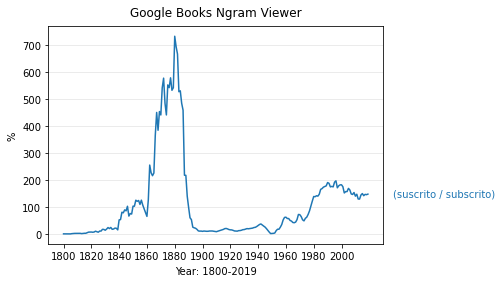

In [105]:
for series in time_series:
    plt.plot(year_values, series["timeseries"], label=series["ngram"])
plt.title("Google Books Ngram Viewer", pad=10)
matplotx.line_labels()  # https://stackoverflow.com/a/70200546/15164646
plt.xticks(list(range(int(params['year_start']), int(params['year_end']) + 1, 20)))
plt.grid(axis="y", alpha=0.3)
plt.ylabel("%", labelpad=5)
plt.xlabel(f"Year: {params['year_start']}-{params['year_end']}", labelpad=5)
plt.show()

In [97]:
html

'[{"ngram": "Albert Einstein", "parent": "", "type": "NGRAM", "timeseries": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.710658612656516e-10, 5.710658612656516e-10, 1.0610017626382679e-09, 1.0610017626382679e-09, 1.0610017626382679e-09, 1.0610017626382679e-09, 1.0610017626382679e-09, 4.899359013726163e-10, 4.899359013726163e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.639402595696603e-10, 5.639402595696603e-10, 5.639402595696603e-10, 5.639402595696603e-10, 5.639402595696603e-10, 5.639402595696603e-10, 5.639402595696603e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 5.590982914733494e-10, 5.590982914733494e-10, 5.590982914733494e-10, 5.590982914733494e-10, 5.590982914733494e-10, 5.590982914733494e-10, 5.590982914733494e-10, 0.0, 0.0, 1.9247662511442545e